In [1]:
# import packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
%matplotlib notebook

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# loading MNIST
df = pd.read_csv("../../DataSet/mnist_train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# input and output features
X = df.iloc[:,1:].to_numpy() / 255.0
Y = df.iloc[:,0].to_numpy()

In [5]:
# train and test split
Xtrain, Xtest, Ytrain, Ytest = X[:-1000], X[-1000:], Y[:-1000], Y[-1000:]

In [6]:
# Shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)

In [7]:
# conver to float32 for Tensorflow computation
Xtrain = Xtrain.astype(np.float32)
Xtest = Xtest.astype(np.float32)

In [8]:
def showPic(x,y):
    plt.figure(figsize=(3,3))
    plt.title("Digit: " + str(y))
    plt.imshow(x.reshape(28,28))
    plt.show()

<IPython.core.display.Javascript object>


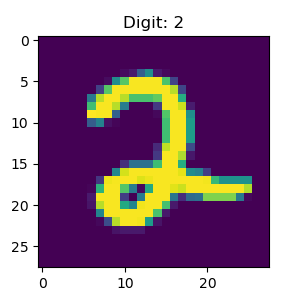

In [9]:
# test PIC
id = 1
showPic(Xtrain[id], Ytrain[id])

In [12]:
def oneHotEncode(y):
    T = np.zeros((y.shape[0], np.unique(y).shape[0]))
    
    for i,val in enumerate(y):
        T[i,val] = 1
        
    return T

In [35]:
T = oneHotEncode(Ytrain) # Apply OneHotencode to Ytrain
Tt = oneHotEncode(Ytest)
N = Xtrain.shape[0] # Num samples
D = Xtrain.shape[1] # Num input features
M = 100 # Num Hidden Nodes in 1 layer
K = T.shape[1] # Num output features
lr = 0.1 # Learning Rate
beta1 = 0.9 # momentum
beta2 = 0.999 # cache
iterations = 100
train_loss = []
test_loss = []
np.random.seed(1)

# Placeholders for Training Data
Xt = tf.placeholder(tf.float32, shape=[None, D], name="Xtrain")
Yt = tf.placeholder(tf.float32, shape=[None, K], name="Ytrain")

# Weights initialization
W1 = tf.Variable(np.random.randn(D,M).astype(np.float32), "w1")
b1 = tf.Variable(np.random.randn(M).astype(np.float32), "b1")
W2 = tf.Variable(np.random.randn(M,K).astype(np.float32), "w2")
b2 = tf.Variable(np.random.randn(K).astype(np.float32), "b2")

Z1 = tf.nn.sigmoid(tf.matmul(Xt,W1)+b1)
Z2 = tf.matmul(Z1,W2)+b2

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(Yt,Z2))

train_optimizer = tf.train.AdamOptimizer(lr,beta1,beta2,name="Adam").minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(iterations):
        sess.run(train_optimizer, feed_dict={Xt:Xtrain, Yt:T})
        ctrain = sess.run(cost, feed_dict={Xt:Xtrain, Yt:T})
        ctest = sess.run(cost, feed_dict={Xt:Xtest, Yt:Tt})
        train_loss.append(ctrain)
        test_loss.append(ctest)
        sys.stdout.write("\nIterations: %d | Train Cost: %.3f | Test Cost: %.3f" % (i+1, ctrain, ctest))


Iterations: 1 | Train Cost: 538046.750 | Test Cost: 8495.844
Iterations: 2 | Train Cost: 392932.438 | Test Cost: 6262.577
Iterations: 3 | Train Cost: 321770.562 | Test Cost: 5241.344
Iterations: 4 | Train Cost: 272539.188 | Test Cost: 4300.540
Iterations: 5 | Train Cost: 255392.531 | Test Cost: 4064.330
Iterations: 6 | Train Cost: 188969.250 | Test Cost: 2970.367
Iterations: 7 | Train Cost: 122959.141 | Test Cost: 1823.166
Iterations: 8 | Train Cost: 82984.852 | Test Cost: 1106.817
Iterations: 9 | Train Cost: 64866.016 | Test Cost: 824.382
Iterations: 10 | Train Cost: 75551.383 | Test Cost: 981.549
Iterations: 11 | Train Cost: 86767.164 | Test Cost: 1169.498
Iterations: 12 | Train Cost: 75656.641 | Test Cost: 1036.691
Iterations: 13 | Train Cost: 61812.430 | Test Cost: 868.566
Iterations: 14 | Train Cost: 55478.934 | Test Cost: 788.382
Iterations: 15 | Train Cost: 53197.113 | Test Cost: 763.901
Iterations: 16 | Train Cost: 51157.469 | Test Cost: 724.833
Iterations: 17 | Train Cost: 48

<IPython.core.display.Javascript object>


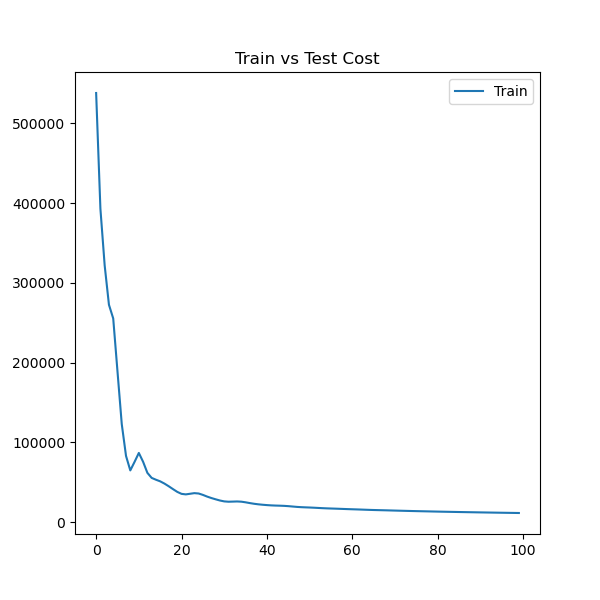

In [34]:
plt.figure(figsize=(6,6))
plt.title("Train vs Test Cost")
plt.plot(tloss, label="Train")
plt.plot(loss, label="Train")
plt.legend()
plt.show()